# Peaks Analysis

## Notebook Summary
- Loads aggregated peak and turning-point data from `export/data/all_peaks.csv`.
- Separates peaks (`find_peaks_cwt`) and turning points (`find_peaks`) for comparison.
- Computes the depth-difference metric `Diff_Z` as the core transformation for analysis.
- Generates comparative boxplot statistics by condition, result layer, and detected layer.


## Imports and Helper Functions
Load shared imports, constants, and helper functions from `functions.ipynb`.


In [1]:
# Load shared imports, paths, plotting settings, and helper utilities.
%run functions.ipynb


## Load and Prepare Peak Data
Read exported peak metrics, split by detection method, and compute `Diff_Z` for subsequent comparisons.


In [2]:
# Load aggregated peak and turning-point data from the export directory.
all_peaks = pd.read_csv(rf'{export_data}all_peaks.csv', sep=";")

# Split by detection method to compare CWT peaks and turning points.
peaks = all_peaks[all_peaks['Method'] == 'find_peaks_cwt']
turning_points = all_peaks[all_peaks['Method'] == 'find_peaks']

# Compute depth differences (Diff_Z), the main metric used in this notebook.
peaks = computeDifferenceZ(peaks)
turning_points = computeDifferenceZ(turning_points)
all_peaks = computeDifferenceZ(all_peaks)

# Display transformed tables for a quick sanity check.
display(peaks)
display(turning_points)
display(all_peaks)


,index,Unnamed: 0,Peak_Z,Peak_Layer,Method,Peaks1_Total,Peaks2_Total,Peaks_Total,ProbandId,Block,Trial,TrialNumber,Date,Condition,ResultLayer,ResultLayer_Relative,ResultLayer_Center,Diff_Z,Diff_Trial
0,17,17,-0.028,0,find_peaks_cwt,17,66,83,2,0,0,0,2022-08-01 14:14:01.092,No Feedback,5,0.714286,0.688000,0.000,1.0
1,18,18,-0.128,0,find_peaks_cwt,17,66,83,2,0,0,0,2022-08-01 14:14:01.124,No Feedback,5,0.714286,0.688000,-0.100,0.0
2,19,19,-0.220,1,find_peaks_cwt,17,66,83,2,0,0,0,2022-08-01 14:14:01.155,No Feedback,5,0.714286,0.688000,-0.092,0.0
3,20,20,-0.360,2,find_peaks_cwt,17,66,83,2,0,0,0,2022-08-01 14:14:01.184,No Feedback,5,0.714286,0.688000,-0.140,0.0
4,21,21,-0.020,0,find_peaks_cwt,17,66,83,2,0,0,0,2022-08-01 14:14:01.219,No Feedback,5,0.714286,0.688000,0.340,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50890,59293,21,-0.576,4,find_peaks_cwt,4,22,26,23,3,20,83,2022-08-23 11:29:33.555,No Feedback,7,1.000000,0.938001,-0.052,0.0
50891,59294,22,-0.644,5,find_peaks_cwt,4,22,26,23,3,20,83,2022-08-23 11:29:33.587,No Feedback,7,1.000000,0.938001,-0.068,0.0
50892,59295,23,-0.848,6,find_peaks_cwt,4,22,26,23,3,20,83,2022-08-23 11:29:33.617,No Feedback,7,1.000000,0.938001,-0.204,0.0
50893,59296,24,-0.992,7,find_peaks_cwt,4,22,26,23,3,20,83,2022-08-23 11:29:33.647,No Feedback,7,1.000000,0.938001,-0.144,0.0


,index,Unnamed: 0,Peak_Z,Peak_Layer,Method,Peaks1_Total,Peaks2_Total,Peaks_Total,ProbandId,Block,Trial,TrialNumber,Date,Condition,ResultLayer,ResultLayer_Relative,ResultLayer_Center,Diff_Z,Diff_Trial
0,0,0,-0.128000,0,find_peaks,17,66,83,2,0,0,0,2022-08-01 14:14:00.583,No Feedback,5,0.714286,0.688000,0.000,1.0
1,1,1,-0.220000,1,find_peaks,17,66,83,2,0,0,0,2022-08-01 14:14:00.615,No Feedback,5,0.714286,0.688000,-0.092,0.0
2,2,2,0.000000,0,find_peaks,17,66,83,2,0,0,0,2022-08-01 14:14:00.645,No Feedback,5,0.714286,0.688000,0.220,0.0
3,3,3,-0.100000,0,find_peaks,17,66,83,2,0,0,0,2022-08-01 14:14:00.676,No Feedback,5,0.714286,0.688000,-0.100,0.0
4,4,4,0.000000,0,find_peaks,17,66,83,2,0,0,0,2022-08-01 14:14:00.707,No Feedback,5,0.714286,0.688000,0.100,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8398,59241,10,-0.212000,1,find_peaks,11,30,41,23,3,19,82,2022-08-23 11:28:52.097,No Feedback,1,0.142857,0.188000,0.572,0.0
8399,59272,0,-0.860000,6,find_peaks,4,22,26,23,3,20,83,2022-08-23 11:29:32.930,No Feedback,7,1.000000,0.938001,0.000,1.0
8400,59273,1,-1.000001,0,find_peaks,4,22,26,23,3,20,83,2022-08-23 11:29:32.963,No Feedback,7,1.000000,0.938001,-0.140,0.0
8401,59274,2,-0.932001,7,find_peaks,4,22,26,23,3,20,83,2022-08-23 11:29:32.978,No Feedback,7,1.000000,0.938001,0.068,0.0


,index,Unnamed: 0,Peak_Z,Peak_Layer,Method,Peaks1_Total,Peaks2_Total,Peaks_Total,ProbandId,Block,Trial,TrialNumber,Date,Condition,ResultLayer,ResultLayer_Relative,ResultLayer_Center,Diff_Z,Diff_Trial
0,0,0,-0.128,0,find_peaks,17,66,83,2,0,0,0,2022-08-01 14:14:00.583,No Feedback,5,0.714286,0.688000,0.000,1.0
1,1,1,-0.220,1,find_peaks,17,66,83,2,0,0,0,2022-08-01 14:14:00.615,No Feedback,5,0.714286,0.688000,-0.092,0.0
2,2,2,0.000,0,find_peaks,17,66,83,2,0,0,0,2022-08-01 14:14:00.645,No Feedback,5,0.714286,0.688000,0.220,0.0
3,3,3,-0.100,0,find_peaks,17,66,83,2,0,0,0,2022-08-01 14:14:00.676,No Feedback,5,0.714286,0.688000,-0.100,0.0
4,4,4,0.000,0,find_peaks,17,66,83,2,0,0,0,2022-08-01 14:14:00.707,No Feedback,5,0.714286,0.688000,0.100,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59293,59293,21,-0.576,4,find_peaks_cwt,4,22,26,23,3,20,83,2022-08-23 11:29:33.555,No Feedback,7,1.000000,0.938001,-0.052,0.0
59294,59294,22,-0.644,5,find_peaks_cwt,4,22,26,23,3,20,83,2022-08-23 11:29:33.587,No Feedback,7,1.000000,0.938001,-0.068,0.0
59295,59295,23,-0.848,6,find_peaks_cwt,4,22,26,23,3,20,83,2022-08-23 11:29:33.617,No Feedback,7,1.000000,0.938001,-0.204,0.0
59296,59296,24,-0.992,7,find_peaks_cwt,4,22,26,23,3,20,83,2022-08-23 11:29:33.647,No Feedback,7,1.000000,0.938001,-0.144,0.0


## Compare by Feedback Condition
Create boxplot statistics for `Diff_Z` grouped by feedback condition across peaks, turning points, and combined data.


Condition,No Feedback,Tactile Feedback,Visual Feedback,Combined Feedback
count,13635.000000,14028.000000,11523.000000,11709.000000
mean,-0.022827,-0.021318,-0.027572,-0.025934
std,0.206108,0.202686,0.209829,0.213618
min,-0.932001,-0.944001,-0.900000,-0.944001
25%,-0.120000,-0.120000,-0.124000,-0.124000
50%,-0.068000,-0.072000,-0.084000,-0.088000
75%,0.000000,0.000000,-0.020000,-0.008000
max,1.000001,0.976001,1.000001,0.980001


,0,1,2,3,4
count,13635.000000,14028.000000,11523.000000,11709.000000,50895.000000
mean,-0.022827,-0.021318,-0.027572,-0.025934,-0.024200
std,0.206108,0.202686,0.209829,0.213618,0.207784
min,-0.932001,-0.944001,-0.900000,-0.944001,-0.944001
5%,-0.204000,-0.200000,-0.188000,-0.192000,NaN
10%,-0.164000,-0.160000,-0.152000,-0.156000,NaN
25%,-0.120000,-0.120000,-0.124000,-0.124000,-0.124000
50%,-0.068000,-0.072000,-0.084000,-0.088000,-0.076000
75%,0.000000,0.000000,-0.020000,-0.008000,0.000000
90%,0.132000,0.136000,0.120000,0.132000,NaN


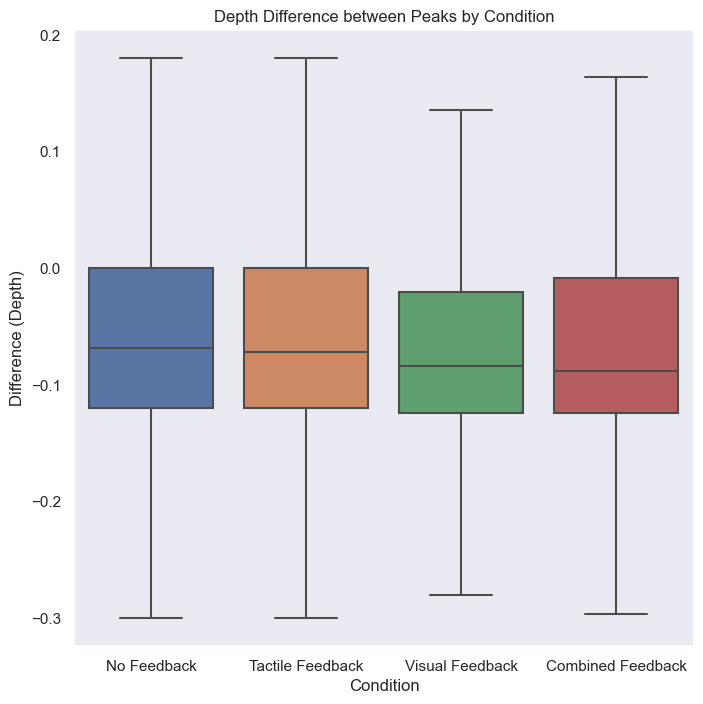

Condition,No Feedback,Tactile Feedback,Visual Feedback,Combined Feedback
count,2718.000000,2889.000000,1342.000000,1454.000000
mean,-0.079873,-0.074166,-0.106689,-0.101662
std,0.316755,0.315372,0.392041,0.410654
min,-1.000001,-1.000001,-1.000001,-1.000001
25%,-0.196000,-0.188000,-0.260000,-0.232000
50%,-0.020000,-0.020000,0.000000,0.000000
75%,0.004000,0.012000,0.000000,0.000000
max,0.872000,0.932001,0.912000,0.932001


,0,1,2,3,4
count,2718.000000,2889.000000,1342.000000,1454.000000,8403.000000
mean,-0.079873,-0.074166,-0.106689,-0.101662,-0.085964
std,0.316755,0.315372,0.392041,0.410654,0.347127
min,-1.000001,-1.000001,-1.000001,-1.000001,-1.000001
5%,-0.696600,-0.700000,-0.895800,-0.953401,NaN
10%,-0.549200,-0.492000,-0.719601,-0.760001,NaN
25%,-0.196000,-0.188000,-0.260000,-0.232000,-0.204000
50%,-0.020000,-0.020000,0.000000,0.000000,0.000000
75%,0.004000,0.012000,0.000000,0.000000,0.000000
90%,0.272000,0.252800,0.367600,0.428000,NaN


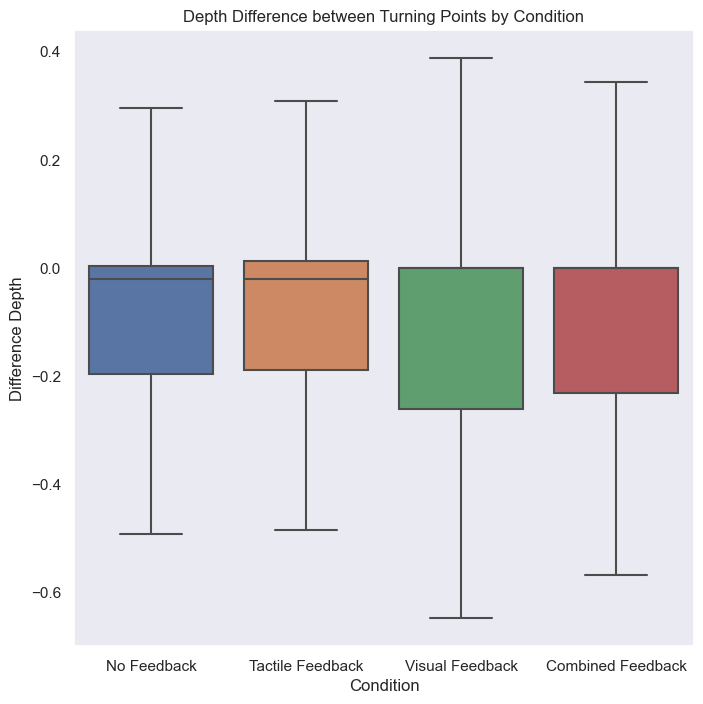

Condition,No Feedback,Tactile Feedback,Visual Feedback,Combined Feedback
count,16353.000000,16917.000000,12865.000000,13163.000000
mean,-0.009355,-0.008382,-0.005975,-0.005613
std,0.272374,0.268262,0.291422,0.295070
min,-1.000001,-1.000001,-1.000001,-1.000001
25%,-0.124000,-0.124000,-0.124000,-0.128000
50%,-0.068000,-0.068000,-0.080000,-0.084000
75%,0.008000,0.020000,0.000000,0.000000
max,1.000001,1.000001,1.000001,1.000001


,0,1,2,3,4
count,16353.000000,16917.000000,12865.000000,13163.000000,59298.000000
mean,-0.009355,-0.008382,-0.005975,-0.005613,-0.007513
std,0.272374,0.268262,0.291422,0.295070,0.280608
min,-1.000001,-1.000001,-1.000001,-1.000001,-1.000001
5%,-0.248000,-0.248000,-0.208000,-0.212000,NaN
10%,-0.184000,-0.184000,-0.164000,-0.168000,NaN
25%,-0.124000,-0.124000,-0.124000,-0.128000,-0.124000
50%,-0.068000,-0.068000,-0.080000,-0.084000,-0.072000
75%,0.008000,0.020000,0.000000,0.000000,0.000000
90%,0.224000,0.221600,0.256000,0.280000,NaN


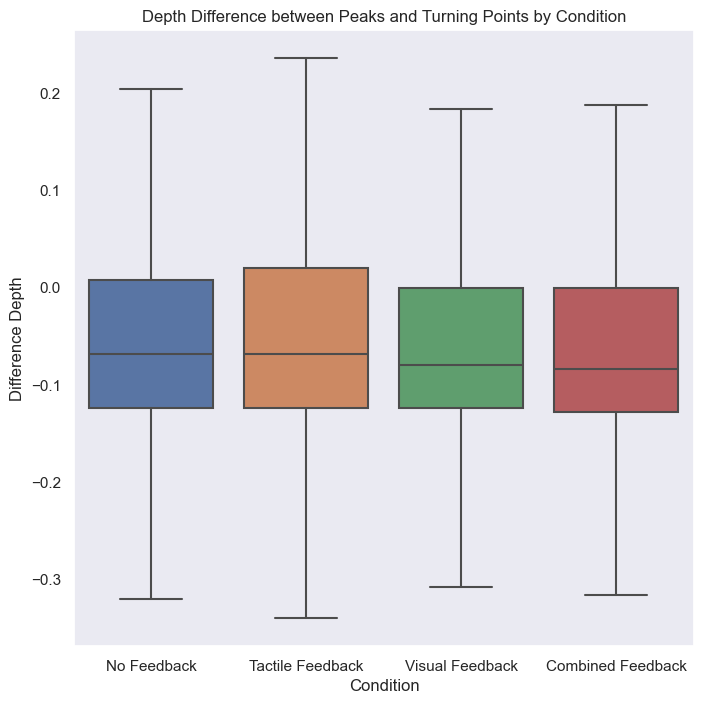

In [3]:
# Compare Diff_Z across feedback conditions for wavelet peaks.
generateBoxPlotStats(peaks, ['Condition'], ['index'], 'Diff_Z', 'Condition', 'Difference (Depth)', 'Depth Difference between Peaks by Condition', 'diffPeaks_Condition', True, True, True, False)
# Compare Diff_Z across feedback conditions for turning points.
generateBoxPlotStats(turning_points, ['Condition'], ['index'], 'Diff_Z', 'Condition', 'Difference Depth', 'Depth Difference between Turning Points by Condition', 'diffTurningPoints_Condition', True, True, True, False)
# Compare Diff_Z across feedback conditions for the combined dataset.
generateBoxPlotStats(all_peaks, ['Condition'], ['index'], 'Diff_Z', 'Condition', 'Difference Depth', 'Depth Difference between Peaks and Turning Points by Condition', 'diffAllPeaks_Condition', True, True, True, False)


## Compare by Result Layer
Evaluate how depth differences vary with the expected result layer for each detection group.


ResultLayer,1,2,3,4,5,6,7
count,6878.000000,7032.000000,7425.000000,7628.000000,7444.000000,7497.000000,6991.000000
mean,-0.019919,-0.020779,-0.022671,-0.022834,-0.025685,-0.027503,-0.029846
std,0.221461,0.218417,0.208784,0.197256,0.191381,0.201582,0.216104
min,-0.756001,-0.932001,-0.728000,-0.900000,-0.760000,-0.944001,-0.944001
25%,-0.124000,-0.124000,-0.124000,-0.124000,-0.120000,-0.124000,-0.124000
50%,-0.080000,-0.080000,-0.076000,-0.074000,-0.072000,-0.076000,-0.080000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.008000
max,0.980001,0.972001,1.000001,1.000001,0.968000,0.976001,0.980001


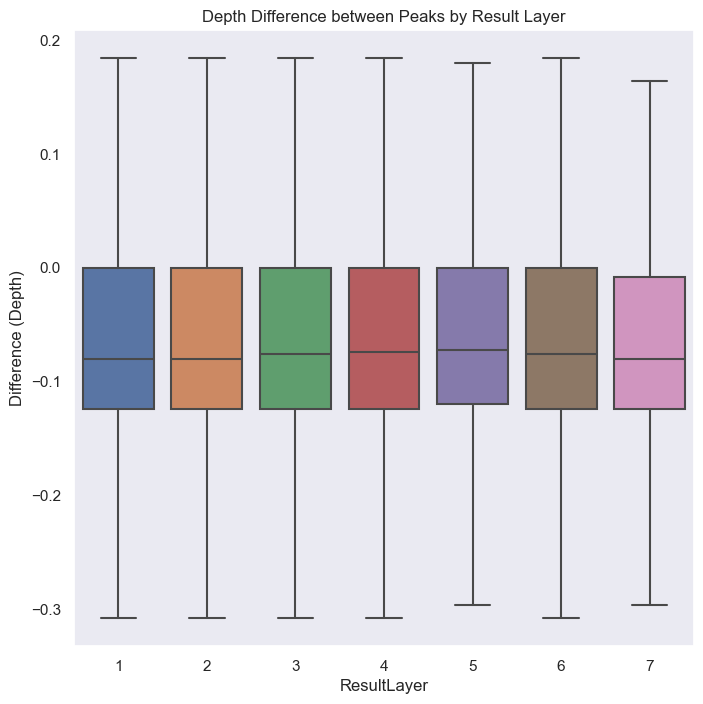

ResultLayer,1,2,3,4,5,6,7
count,1290.000000,1197.000000,1202.000000,1231.000000,1133.000000,1202.000000,1148.000000
mean,-0.051985,-0.081788,-0.087810,-0.088042,-0.098309,-0.098256,-0.099282
std,0.405574,0.397460,0.361845,0.331514,0.287436,0.298808,0.318276
min,-1.000001,-1.000001,-1.000001,-1.000001,-1.000001,-1.000001,-1.000001
25%,-0.200000,-0.212000,-0.243000,-0.206000,-0.212000,-0.187000,-0.177000
50%,0.000000,0.000000,0.000000,0.000000,-0.012000,0.000000,-0.012000
75%,0.024000,0.008000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.912000,0.924001,0.912000,0.888001,0.888001,0.932001,0.932001


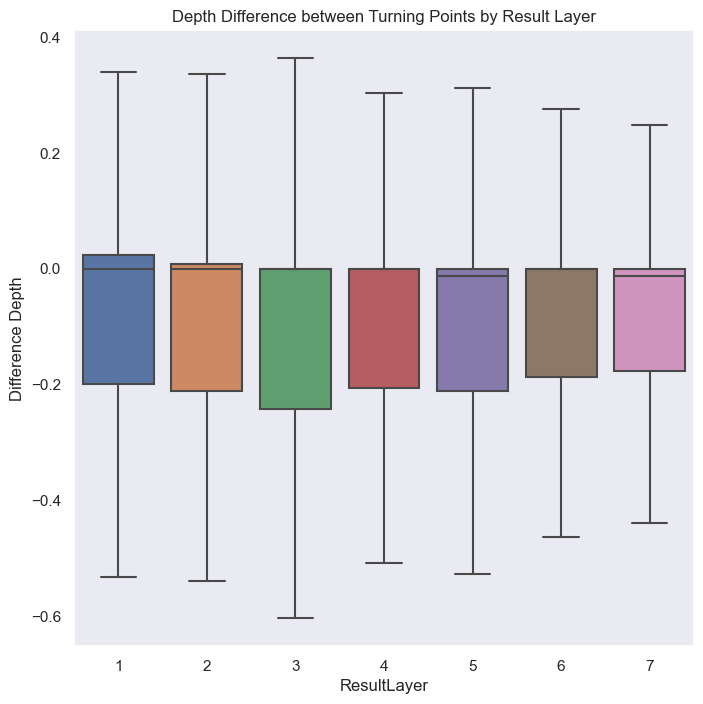

ResultLayer,1,2,3,4,5,6,7
count,8168.000000,8229.000000,8627.000000,8859.000000,8577.000000,8699.000000,8139.000000
mean,-0.004938,-0.007715,-0.008080,-0.006671,-0.007014,-0.008506,-0.009675
std,0.291266,0.288687,0.278595,0.270036,0.267073,0.277387,0.292025
min,-1.000001,-1.000001,-1.000001,-1.000001,-1.000001,-1.000001,-1.000001
25%,-0.128000,-0.128000,-0.124000,-0.124000,-0.124000,-0.124000,-0.124000
50%,-0.076000,-0.076000,-0.072000,-0.072000,-0.072000,-0.072000,-0.076000
75%,0.000000,0.004000,0.000000,0.016000,0.008000,0.000000,0.000000
max,1.000001,1.000001,1.000001,1.000001,1.000001,1.000001,1.000001


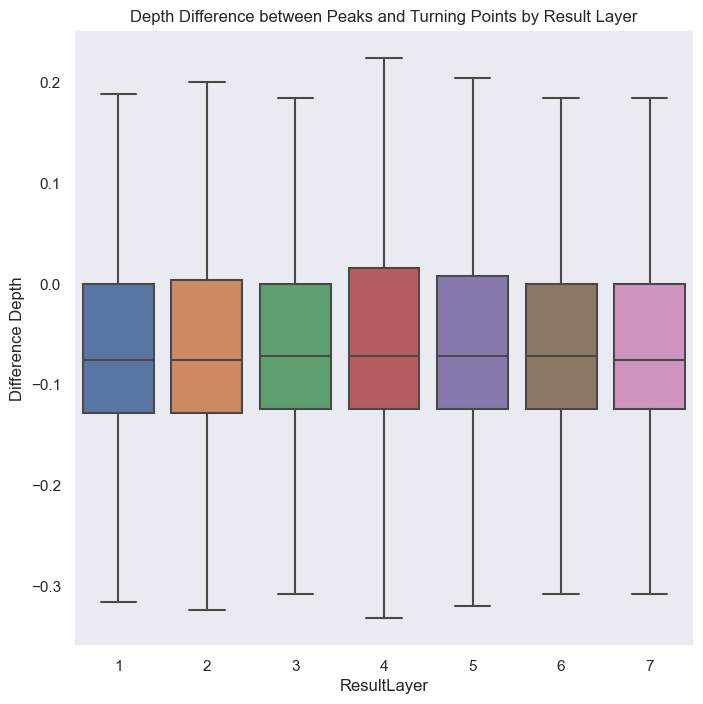

In [4]:
# Compare Diff_Z across result layers for wavelet peaks.
generateBoxPlotStats(peaks, ['ResultLayer'], ['index'], 'Diff_Z', 'ResultLayer', 'Difference (Depth)', 'Depth Difference between Peaks by Result Layer', 'diffPeaks_ResultLayer', True, True, False, False, [], False)
# Compare Diff_Z across result layers for turning points.
generateBoxPlotStats(turning_points, ['ResultLayer'], ['index'], 'Diff_Z', 'ResultLayer', 'Difference Depth', 'Depth Difference between Turning Points by Result Layer', 'diffTurningPoints_ResultLayer', True, True, False, False, [], False)
# Compare Diff_Z across result layers for the combined dataset.
generateBoxPlotStats(all_peaks, ['ResultLayer'], ['index'], 'Diff_Z', 'ResultLayer', 'Difference Depth', 'Depth Difference between Peaks and Turning Points by Result Layer', 'diffAllPeaks_ResultLayer', True, True, False, False, [], False)


## Compare by Detected Layer
Analyze `Diff_Z` by detected peak layer to inspect layer-specific depth behavior.


Peak_Layer,0,1,2,3,4,5,6,7
count,7209.000000,7056.000000,6908.000000,6239.000000,5982.000000,5918.000000,6348.000000,5235.000000
mean,0.205644,-0.030301,-0.071736,-0.074381,-0.067234,-0.061663,-0.057257,-0.078348
std,0.367933,0.222428,0.130376,0.103407,0.105128,0.103152,0.101495,0.087246
min,-0.748000,-0.248000,-0.368000,-0.484000,-0.616000,-0.740000,-0.868000,-0.944001
25%,-0.020000,-0.180000,-0.132000,-0.128000,-0.124000,-0.124000,-0.120000,-0.116000
50%,0.000000,-0.076000,-0.096000,-0.092000,-0.092000,-0.092000,-0.084000,-0.084000
75%,0.364000,0.016000,-0.040000,-0.048000,-0.044000,-0.036000,-0.016000,-0.036000
max,1.000001,0.868001,0.732000,0.592001,0.468000,0.368000,0.244000,0.120000


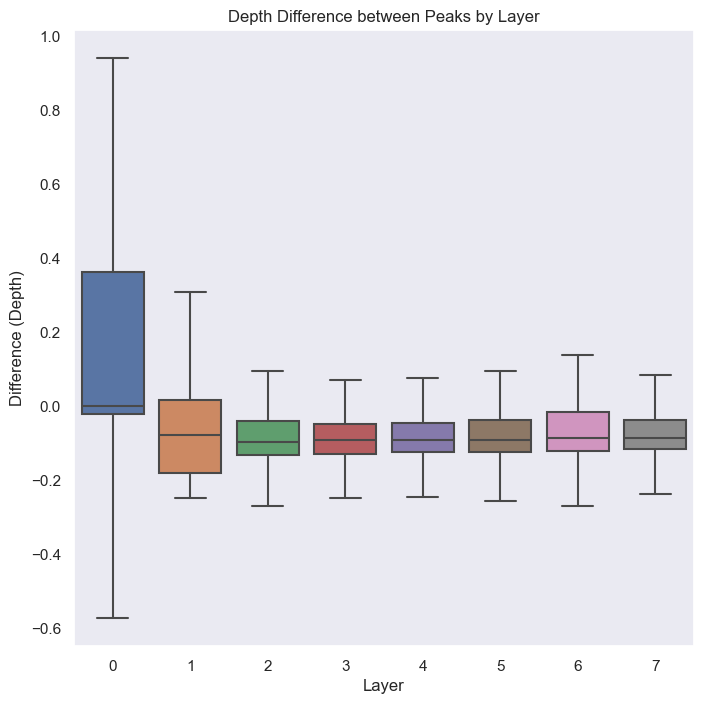

Peak_Layer,0,1,2,3,4,5,6,7
count,2865.000000,1111.000000,1357.000000,786.000000,512.000000,353.000000,399.000000,1020.000000
mean,-0.108610,0.058621,0.043107,-0.018443,-0.067664,-0.125700,-0.215870,-0.348200
std,0.373087,0.272072,0.296991,0.269232,0.263813,0.274305,0.315801,0.350050
min,-1.000001,-0.248000,-0.368000,-0.492000,-0.620000,-0.740000,-0.864000,-1.000001
25%,-0.148000,-0.086000,-0.128000,-0.155000,-0.240000,-0.348000,-0.456000,-0.676000
50%,0.000000,0.000000,-0.028000,-0.088000,-0.104000,-0.080000,-0.116000,-0.280000
75%,0.000000,0.048000,0.076000,0.012000,0.012000,0.028000,0.000000,0.000000
max,0.932001,0.844001,0.744001,0.624000,0.496000,0.364000,0.244000,0.112000


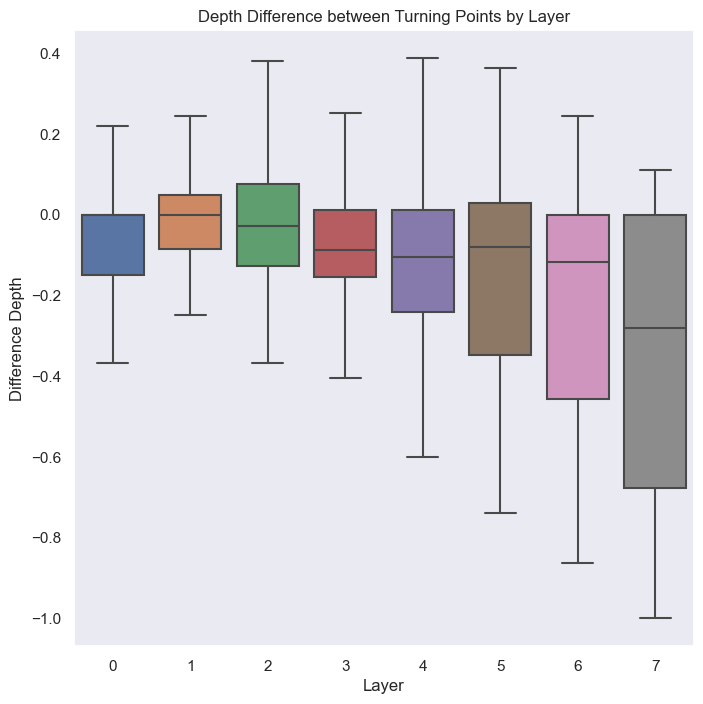

Peak_Layer,0,1,2,3,4,5,6,7
count,10074.000000,8167.000000,8265.000000,7025.000000,6494.000000,6271.000000,6747.000000,6255.000000
mean,0.266014,-0.018204,-0.052880,-0.068122,-0.067268,-0.065268,-0.066637,-0.122353
std,0.485164,0.231807,0.174613,0.133822,0.125131,0.120347,0.130291,0.190462
min,-1.000001,-0.248000,-0.368000,-0.492000,-0.620000,-0.740000,-0.868000,-1.000001
25%,-0.044000,-0.172000,-0.132000,-0.128000,-0.124000,-0.128000,-0.124000,-0.124000
50%,0.088000,-0.064000,-0.088000,-0.092000,-0.092000,-0.092000,-0.084000,-0.088000
75%,0.816000,0.020000,-0.028000,-0.044000,-0.044000,-0.032000,-0.012000,-0.032000
max,1.000001,0.868001,0.744001,0.624000,0.496000,0.368000,0.244000,0.120000


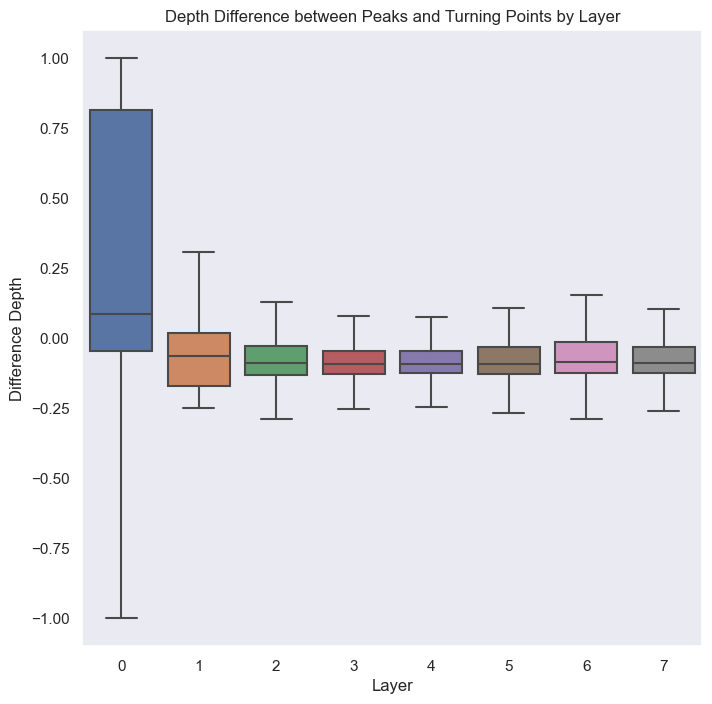

In [5]:
# Compare Diff_Z across detected peak layers for wavelet peaks.
generateBoxPlotStats(peaks, ['Peak_Layer'], ['index'], 'Diff_Z', 'Layer', 'Difference (Depth)', 'Depth Difference between Peaks by Layer', 'diffPeaks_Layer', True, True, False, False, [], False)
# Compare Diff_Z across detected peak layers for turning points.
generateBoxPlotStats(turning_points, ['Peak_Layer'], ['index'], 'Diff_Z', 'Layer', 'Difference Depth', 'Depth Difference between Turning Points by Layer', 'diffTurningPoints_Layer', True, True, False, False, [], False)
# Compare Diff_Z across detected peak layers for the combined dataset.
generateBoxPlotStats(all_peaks, ['Peak_Layer'], ['index'], 'Diff_Z', 'Layer', 'Difference Depth', 'Depth Difference between Peaks and Turning Points by Layer', 'diffAllPeaks_Layer', True, True, False, False, [], False)
